# Misc Viz
In this notebook we build a figure to compare CORAL's performance to several baselines. 

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick
import seaborn as sns

import json

from matplotlib import pyplot as plt
from scipy.stats import wilcoxon

In [2]:
READABLE_LABELS = ["STAGE_PAD","WRANGLE","EXPLORE","MODEL","EVALUATE","IMPORT"]
ORDERED_LABELS = ["IMPORT","WRANGLE","EXPLORE","MODEL","EVALUATE","STAGE_PAD"]
READABLE_LABEL_TO_INT = dict(zip(READABLE_LABELS,range(len(READABLE_LABELS))))

In [3]:
def save_for_pub(path):
    plt.savefig(path,bbox_inches="tight",transparent = True)

In [4]:
baseline_accuracies = pd.DataFrame([["BERT (No AST, No Finetuning)", 0.679, (0.649,0.708)],
                                    ["BERT (No AST, Finetuning)",0.649, (0.619,0.678)],
                                    ["BERT (AST, Finetuning)", 0.674,(0.644,0.703)],
                                    ["BERT (AST, No Finetuning)", 0.679, (0.649,0.708)],
                                    ["Word2Vec (No AST)",0.297, (0.269,0.324)],
                                    ["Word2Vec (With AST)",0.426,(0.3946,0.4573)],
                                    ["Expert Heuristics", 0.341,  (0.3192, 0.3628)],
                                    ["LDA+Weak Supervision", 0.428, (0.4063, 0.4533)],
                                    ["CORAL"  , 0.722,  (0.694, 0.749)],
                                    ["LSTM (No Markdown)"  , 0.5690,  (0.546, 0.592)],
                                    ["LSTM" , 0.5886,  (0.5661, 0.611)],
                                    ["Tree LSTM (No Markdown)" , 0.6120,  (0.590, 0.6342)],
                                    ["Tree LSTM" , 0.6304,  (0.608, 0.6525)],
                                    ["Tree-Based CNN" , 0.5957,  (0.576, 0.6181)]],
                                    columns = ["Model","Accuracy","Error Bars"]).sort_values("Accuracy",ascending = False)
                                    
ablation_accuracies = pd.DataFrame([["CORAL"  , 0.722,  (0.694, 0.749)],
                                    ["CORAL (No Markdown)",  0.601,  (0.5794, 0.6264)],
                                    ["CORAL (No Unsupervised Topic Model)", 0.624 , (0.6029, 0.6476)],
                                    ["CORAL (No Masked Attention)", 0.701, (0.673,0.72)]],
#                                     ["CORAL \n(75% weak supervision)",  0.5799 , (0.5576, 0.6029)],
#                                     ["CORAL \n(50% weak supervision)",  0.4625 , (0.4390, 0.4865)],
#                                     ["CORAL \n(25% weak supervision)",  0.4017,  (0.3794, 0.4246)]], 
                         columns = ["Model","Accuracy","Error Bars"]).sort_values("Accuracy",ascending = False)

In [5]:
baseline_accuracies["error_size"] = baseline_accuracies.apply(lambda x: (x["Accuracy"] - x["Error Bars"][0]), axis = 1)
ablation_accuracies["error_size"] = ablation_accuracies.apply(lambda x: (x["Accuracy"] - x["Error Bars"][0]), axis = 1)

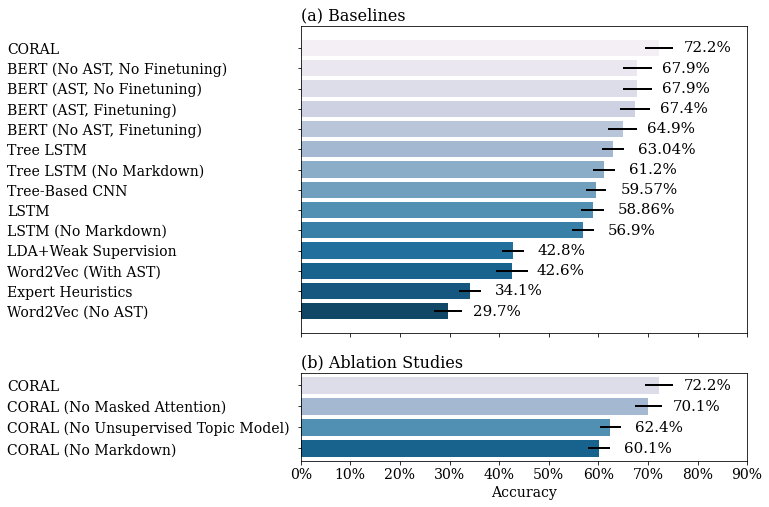

In [6]:
def bars_with_labels_and_errors(df,palette = "GnBu_d", ax = None):
    sns.barplot(data = df, y = "Model", x = "Accuracy",
               palette = palette, ax=ax)

    plt.ylabel(None)
#     plt.xlabel("")
    plt.xlim(0,0.9) 
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

    # set individual bar lables using above list
    for i,patch in enumerate(ax.patches):
        # get_width pulls left or right; get_y pushes up or down
        
        bar_end_x = patch.get_width()
        bar_middle_y = patch.get_y() + patch.get_height() /2
        
        accuracy = df.iloc[i]["Accuracy"]
        ax.text(bar_end_x + 0.05, bar_middle_y, \
                str(round((accuracy)*100, 2))+'%',
                verticalalignment='center')

        error_size = df.iloc[i]["error_size"]
        ax.errorbar(xerr = error_size, x = bar_end_x, y = bar_middle_y, c= "black")

        
# barplot_palette = sns.light_palette((260, 75, 60), input="husl")

n_baselines = len(baseline_accuracies)
n_ablation = len(ablation_accuracies)
with plt.style.context("publications.mplstyle"):
    
    tick_pad = 290
    fig = plt.figure(figsize=(8, 8)) 
    gs = gridspec.GridSpec(2, 1, height_ratios=[n_baselines, n_ablation]) 
   
    ax1 = plt.subplot(gs[0])
    baseline_palette = sns.color_palette("PuBu",n_colors = n_baselines)
    bars_with_labels_and_errors(baseline_accuracies, ax = ax1, palette = baseline_palette)
    
    ax1.set_xlabel("")
    ax1.set_ylabel("")
    ax1.set_title("(a) Baselines", loc = "left")
    ax1.tick_params(axis = "y", pad = tick_pad)
    ax1.set_yticklabels(ax1.get_yticklabels(), ha = "left")
    plt.setp(ax1.get_xticklabels(), visible=False)
    
    
    ablation_palette = sns.color_palette("PuBu",n_colors = n_ablation)
    ax2 = plt.subplot(gs[1],sharex = ax1)
    bars_with_labels_and_errors(ablation_accuracies, ax = ax2, palette = ablation_palette)
    
    ax2.set_title("(b) Ablation Studies", loc = "left")
    ax2.tick_params(axis = "y", pad = tick_pad)
    ax2.set_yticklabels(ax2.get_yticklabels(), ha = "left")
    
    save_for_pub("figs/model_performance_with_baselines.pdf")

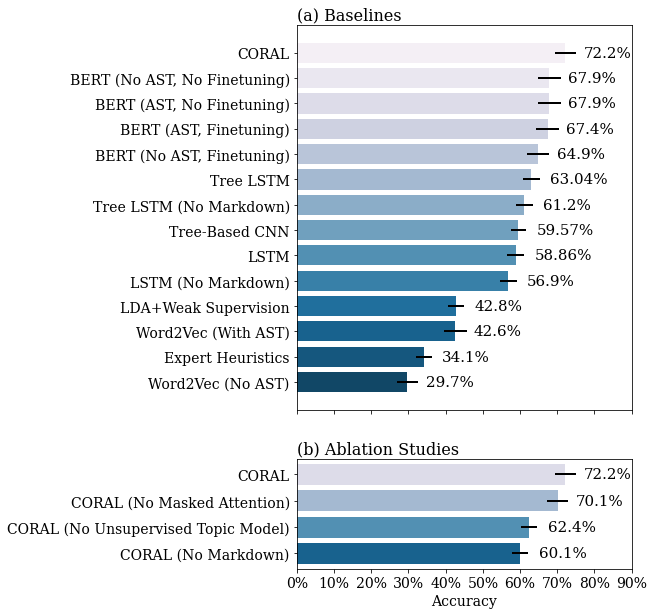

In [7]:
with plt.style.context("publications.mplstyle"):
    
    tick_pad = 290
    fig = plt.figure(figsize=(6, 10)) 
    gs = gridspec.GridSpec(2, 1, height_ratios=[n_baselines, n_ablation]) 
   
    ax1 = plt.subplot(gs[0])
    baseline_palette = sns.color_palette("PuBu",n_colors = n_baselines)
    bars_with_labels_and_errors(baseline_accuracies, ax = ax1, palette = baseline_palette)
    
    ax1.set_xlabel("")
    ax1.set_ylabel("")
    ax1.set_title("(a) Baselines", loc = "left")
    plt.setp(ax1.get_xticklabels(), visible=False)
    
    
    ablation_palette = sns.color_palette("PuBu",n_colors = n_ablation)
    ax2 = plt.subplot(gs[1],sharex = ax1)
    bars_with_labels_and_errors(ablation_accuracies, ax = ax2, palette = ablation_palette)
    
    ax2.set_title("(b) Ablation Studies", loc = "left")

    
    save_for_pub("figs/model_performance_with_baselines.pdf")

# Wilcoxon signed rank test for accuracy

In [8]:
def load_graphs(path,read_mode = "r",sort = False, remove_stage_pad = False):
    graphs = []
    with open(path,read_mode) as f:
        for line in f:
            graphs.append(json.loads(line))
    if sort:
        graphs = sorted(graphs,key = lambda i: (i['file'], int(i['id'])))
    if remove_stage_pad:
        graphs = list(filter(lambda x: x["stage"] != 0, graphs))
    return graphs

def get_is_correct(graphs):
    values = [[x["stage"],x["pred"]] for x in graphs]
    is_correct = []
    for i, g in enumerate(graphs):
        is_correct.append(int(g["stage"]) == int(g["pred"]))
    return np.array(is_correct).astype(int)

In [9]:
AST_NO_FINE_TUNE_PATH = "/projects/bdata/jupyter/gezhang_backup/CORAL/results/ast_no_finetune.txt"
CORAL_PATH = "/projects/bdata/jupyter/gezhang_backup/CORAL/results/CORAL.txt"

coral_graphs = load_graphs(CORAL_PATH,sort=True,remove_stage_pad=True)
ast_no_fine_tune_graphs = load_graphs(AST_NO_FINE_TUNE_PATH,sort=True, remove_stage_pad=True)

coral_correct = get_is_correct(coral_graphs)
ast_no_fine_tune_correct = get_is_correct(ast_no_fine_tune_graphs)

In [10]:
wilcoxon(coral_correct,ast_no_fine_tune_correct)

WilcoxonResult(statistic=38104.0, pvalue=0.0001186001386622471)

In [11]:
NO_MASKED_ATTENTION_PATH="/projects/bdata/jupyter/gezhang_backup/CORAL/results/CORAL_full_att.txt"
no_masked_attention_graphs = load_graphs(NO_MASKED_ATTENTION_PATH,sort=True, remove_stage_pad=True)
no_masked_attention_correct = get_is_correct(no_masked_attention_graphs)

In [12]:
wilcoxon(coral_correct,no_masked_attention_correct)

WilcoxonResult(statistic=31584.0, pvalue=0.04401464255473544)

# Does CORAL with markdown improve performance on cells that don't have markdown?

In [13]:
CORAL_NO_MARKDOWN_PATH = "/projects/bdata/jupyter/gezhang_backup/CORAL/results/CORAL_no_markdown.txt"
coral_no_markdown_graphs = load_graphs(CORAL_NO_MARKDOWN_PATH,sort=True,remove_stage_pad=True)

coral_no_markdown_df = pd.DataFrame(coral_no_markdown_graphs)[["file","id","stage","pred","annotation"]]
coral_no_markdown_df["model"] = "coral_no_markdown"

coral_df = pd.DataFrame(coral_graphs)[["file","id","stage","pred","annotation"]]
coral_df["model"] = "coral"

results_df = pd.concat([coral_df,coral_no_markdown_df])

results_df["has_markdown"] = results_df["annotation"].map(lambda x: bool(len(x)))

def get_accuracy(df):
    return sum(df["pred"].astype(int) == df["stage"].astype(int)) / len(df)

In [14]:
results_df.groupby(["model","has_markdown",]).apply(get_accuracy)

model              has_markdown
coral              False           0.725926
                   True            0.712245
coral_no_markdown  False           0.596296
                   True            0.630612
dtype: float64

In [15]:
(sum(results_df["has_markdown"]) / len(results_df["has_markdown"])) / 3

0.08876811594202899

# Some summary statistics for the dataset:

In [35]:
full_dataset = load_graphs("/projects/bdata/jupyter/gezhang_backup/jupyter-notebook-analysis/graphs/cell_with_func_python23_5_22_rel_pos.txt",remove_stage_pad=False)

In [36]:
full_dataset = pd.DataFrame(full_dataset)

In [37]:
full_dataset.head()

,target_lineno,file,context,target_func,nodes,funcs,neighbor_cells,id,header,annotation,relative_position,stage
0,7,/projects/bdata/jupyter/target/nb_828079.py,\nimport numpy as np\n\nimport matplotlib.pypl...,none_func,"[{'type': 'Module', 'children': [1, 4, 7, 14, ...","[get_ipython.magic, get_ipython, os.chdir, sys...",[-1],1321767,,"[ coding utf 8, Brewing Logistic Regression t...",0.000000,NaN
1,55,/projects/bdata/jupyter/target/nb_828079.py,"\nget_ipython().run_cell_magic('timeit', '', ""...",none_func,"[{'type': 'Module', 'children': [1]}, {'type':...","[get_ipython.run_cell_magic, get_ipython]",[1321767],1321768,,[ Learn and evaluate scikit learn s logistic r...,0.142857,NaN
2,179,/projects/bdata/jupyter/target/nb_828079.py,"\nget_ipython().run_cell_magic('timeit', '', '...",none_func,"[{'type': 'Module', 'children': [1]}, {'type':...","[get_ipython.run_cell_magic, get_ipython]",[1321768],1321769,,[ Time to learn and evaluate our Caffeinated l...,0.285714,NaN
3,187,/projects/bdata/jupyter/target/nb_828079.py,\nget_ipython().system('./build/tools/caffe tr...,none_func,"[{'type': 'Module', 'children': [1]}, {'type':...","[get_ipython.system, get_ipython]",[1321769],1321770,,[ Do the same through the command line interfa...,0.428571,NaN
4,233,/projects/bdata/jupyter/target/nb_828079.py,"\nget_ipython().run_cell_magic('timeit', '', '...",none_func,"[{'type': 'Module', 'children': [1]}, {'type':...","[get_ipython.run_cell_magic, get_ipython]",[1321770],1321771,,[],0.571429,NaN


In [40]:
full_dataset["context"].str.replace("\n\n","\n").str.count("\n").mean()

3.8867598463306434

In [42]:
full_dataset["funcs"].apply(lambda x: len(x)).mean()

2.0482747960320626